# Game 7 Scoring in the NBA Playoffs

There's been a successful betting system as of late which had the total for any NBA Playoff game 7 being UNDER the actual score. Although we may have missed the boat here (the season is finished), I want to dig into those specific numbers to see how the full macro picture of the numbers to tell if there's any hard and fast rule when betting game 7s. As we know, you don't bet the team, you bet the line, and with any profitable trend in sports gambling the book will eventually adjust when enough people catch on.

In [9]:
os.getcwd()

'/Users/alecnigh'

In [147]:
#Updating the path we pick this file from because I just downloaded it

path = '/Users/alecnigh/Downloads'
os.chdir(path)

We begin by importing our data compliments of NBA Hoops Online and cross referenced with w=Wikipedia.

In [211]:
# importing our data and packages
import pandas as pd
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('NBA_Game_7s - Total_Game_7s.csv')
df.head(25)

,Year,Playoff round,Date,Venue,Winner,Result,Loser,OT,Winning_Score,Losing_Score,Actual_Total
0,1948,Semifinals,"April 6, 1948",St. Louis Arena,Philadelphia Warriors,85-46,St. Louis Bombers,0,85,46,131
1,1951,Finals,"April 21, 1951",Edgerton Park Arena,Rochester Royals,79-75,New York Knicks,0,79,75,154
2,1952,Finals,"April 25, 1952",Minneapolis Auditorium,Minneapolis Lakers,82-65,New York Knicks,0,82,65,147
3,1954,Finals,"April 12, 1954",Minneapolis Auditorium,Minneapolis Lakers,87-80,Syracuse Nationals,0,87,80,167
4,1955,Finals,"April 10, 1955",Onondaga War Memorial,Syracuse Nationals,92-91,Fort Wayne Pistons,0,92,91,183
5,1957,Finals,"April 13, 1957",Boston Garden,Boston Celtics,125-123 (2OT),St. Louis Hawks,1,125,123,248
6,1959,Division Finals,"April 1, 1959",Boston Garden,Boston Celtics,130-125,Syracuse Nationals,0,130,125,255
7,1960,Division Finals,"March 26, 1960",Kiel Auditorium,St. Louis Hawks,97-86,Minneapolis Lakers,0,97,86,183
8,1960,Finals,"April 9, 1960",Boston Garden,Boston Celtics,122-103,St. Louis Hawks,0,122,103,225
9,1961,Division Finals,"April 1, 1961",Kiel Auditorium,St. Louis Hawks,105-103,Los Angeles Lakers,0,105,103,208


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           148 non-null    int64 
 1   Playoff round  148 non-null    object
 2   Date           148 non-null    object
 3   Venue          148 non-null    object
 4   Winner         148 non-null    object
 5   Result         148 non-null    object
 6   Loser          148 non-null    object
 7   OT             148 non-null    int64 
 8   Winning_Score  148 non-null    int64 
 9   Losing_Score   148 non-null    int64 
 10  Actual_Total   148 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 12.8+ KB


In [201]:
# updating our Date column to reflect the date data type
df["Date"] = df['Date'].astype('datetime64')

Before we look at our numbers, let's visualize the data:

,Actual_Total
count,148.000000
mean,196.128378
std,25.626379
min,131.000000
25%,176.000000
50%,194.500000
75%,213.250000
max,273.000000


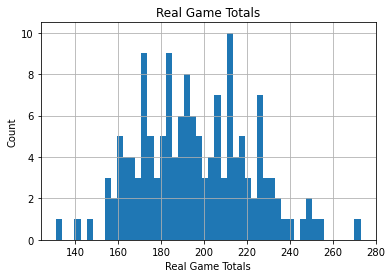

In [156]:
ax = df['Actual_Total'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Real Game Totals')
ax.set_title('Real Game Totals')
pd.DataFrame(df['Actual_Total'].describe())

Looks like a fairly normal distribution, despite only having a population size of 148. I want to visualize our data according to the date to see if there's some kind of time trend to be concerned with considering the evolution of small ball lineups, the explosion of 3 point shooting, and even as far back as the 1979-1980 season with the addition of the 3 point line are all factors that could cause some variations in scoring averages.

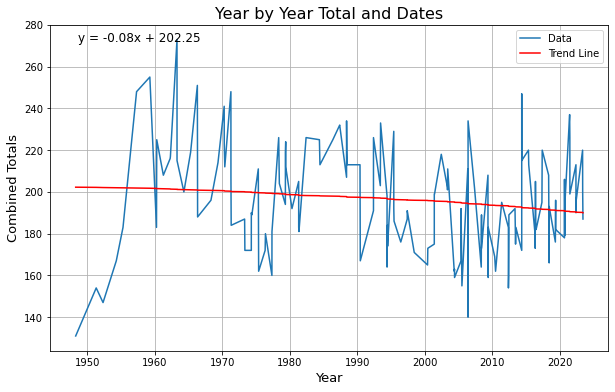

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the line graph
x_axis = df['Date']
y_axis = df['Actual_Total']

# Calculate the trend line using NumPy's polyfit function
z = np.polyfit(range(len(y_axis)), y_axis, 1)
p = np.poly1d(z)

# Get the equation of the trend line
slope = z[0]
intercept = z[1]
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the line graph with trend line equation
plt.plot(x_axis, y_axis, label='Data')
plt.plot(x_axis, p(range(len(y_axis))), 'r-', label='Trend Line')
plt.title('Year by Year Total and Dates', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Combined Totals', fontsize=13)
plt.grid(True)
plt.legend()

# Add the trend line equation as a text annotation
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

# Display the graph
plt.show()

So according to our graph, people just didn't play defense in the late 1950s up until the early 1970s. Despite the rule changes making scoring in the regular seasomn at an all time high, we see those not really impact our totals from a historical perspective. Another fun -- albeit random -- note is from 2008-2014, there was only 1 total out of 18 game 7s that went over 200 points. Looks like the scoring has evened out a little since then.

I want to subset the data so it's more relavent to modern day. Let's take the totals from game 7 from 2000 until now and see if there's a similar trend.

In [202]:
df_2000 =  df.loc[(df['Year'] >= 1999)]

,Actual_Total
count,72.000000
mean,190.652778
std,22.759093
min,140.000000
25%,173.000000
50%,191.000000
75%,206.250000
max,247.000000


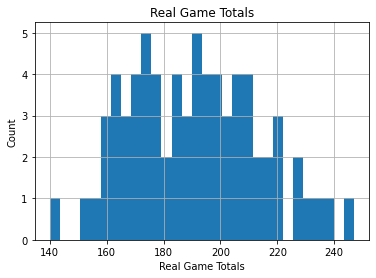

In [209]:
# First histogram

ax = df_2000['Actual_Total'].hist(bins=30)
ax.set_ylabel('Count')
ax.set_xlabel('Real Game Totals')
ax.set_title('Real Game Totals')
pd.DataFrame(df_2000['Actual_Total'].describe())

Our distribution is slightly right tailed, with the concentration below 210 (over 75% of games). Apparently, filtering the games where people did not play defense has caused our mean actual scores to decrease from the full population. By omitting those games though, we have a smaller standard deviation by about 3 points which could mean the differnce of about 2 or 3 possessions in a game.

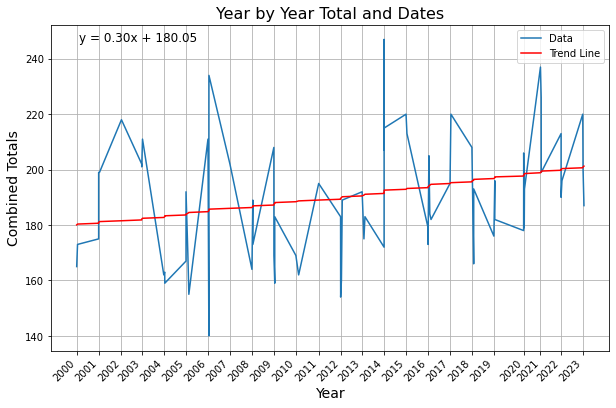

In [205]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the line graph
x_axis = df_2000['Date']
y_axis = df_2000['Actual_Total']

# Calculate the trend line using NumPy's polyfit function
z = np.polyfit(range(len(y_axis)), y_axis, 1)
p = np.poly1d(z)

# Get the equation of the trend line
slope = z[0]
intercept = z[1]
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the line graph with trend line equation
plt.plot(x_axis, y_axis, label='Data')
plt.plot(x_axis, p(range(len(y_axis))), 'r-', label='Trend Line')
plt.title('Year by Year Total and Dates', fontsize=16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Combined Totals', fontsize = 14)
plt.grid(True)
plt.legend()

# Adjust the x-axis tick labels
tick_indices = [x_axis[x_axis.dt.year == year].iloc[0] for year in range(2000, 2024)]
plt.xticks(tick_indices, [str(year) for year in range(2000, 2024)], rotation=45, ha='right')

# Add the trend line equation as a text annotation
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

# Display the graph
plt.show()


So here we see some information that reflects the evolution of the league from the brutal tough fadeaway, handchecking days of the aughts to the smallball, Morey-ball style of play seen today. Now I wish to diverge our analysis and discuss the specific winning and losing teams scores as I view the derviative market as being more inefficient and thus easier to be profitable. Despite not knowing which team will win prior to the game, note the following statistics.

Stats prior to 2020 courtesy of https://www.vegasinsider.com/nba/story.cfm/story/855408/

    -- The NBA has had 148 Game 7’s in playoff history

    -- The home team is 109-35 (76%) in those games
    
    -- We excluded the bubble games as they would not have a home court advantage in it's purest form
    
    -- Interestingly enough, since the bubble in 2020, home teams are just 4-7 (36%) SU in game 7s.

So the question begs to be answered: can we blindly bet the away teams team total under? Let's find out starting with the sinning scores.

,Winning_Score
count,148.000000
mean,103.270270
std,13.114667
min,79.000000
25%,92.750000
50%,103.000000
75%,112.250000
max,142.000000


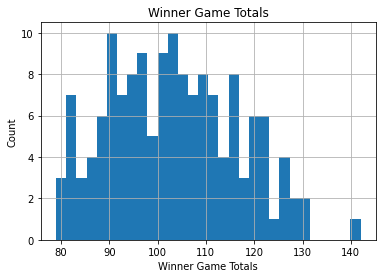

In [145]:
# Checking out the raw stats for the winning score

ax = df['Winning_Score'].hist(bins=30)
ax.set_ylabel('Count')
ax.set_xlabel('Winner Game Totals')
ax.set_title('Winner Game Totals')
pd.DataFrame(df['Winning_Score'].describe())

Looks somewhat Normal as a distribution that's slightly right tailed. This is intuitive as the winner would probably be scoring on the higher range vs the lower range as they won the game.

Next let's examine the losing scores.

,Losing_Score
count,148.000000
mean,92.858108
std,13.925462
min,46.000000
25%,83.750000
50%,92.000000
75%,102.250000
max,131.000000


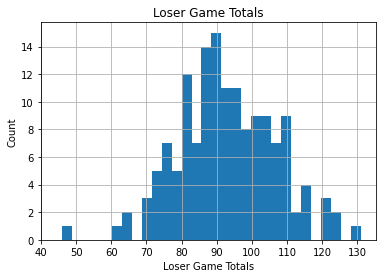

In [167]:
# Checking out the raw stats for the losing score

ax = df['Losing_Score'].hist(bins=30)
ax.set_ylabel('Count')
ax.set_xlabel('Loser Game Totals')
ax.set_title('Loser Game Totals')
plt.xticks(range(min(df['Losing_Score'])-6, max(df['Losing_Score']), 10))
pd.DataFrame(df['Losing_Score'].describe())

The graph is also normal distributed with a slight left tail and an EXTREME outlier from the first ever game 7 played in 1948 (the good old days). For the sake of this discussion, let's isolate some of the overtime games and see how many of the losing high scores came from that batch.

In [161]:
df_ot = df[df['OT'] == 1]

# Print the filtered dataframe
df_ot.head(10)

,Year,Playoff round,Date,Venue,Winner,Result,Loser,OT,Winning_Score,Losing_Score,Actual_Total
5,1957,Finals,1957-04-13,Boston Garden,Boston Celtics,125-123 (2OT),St. Louis Hawks,1,125,123,248
11,1962,Finals,1962-04-18,Boston Garden,Boston Celtics,110-107 (OT),Los Angeles Lakers,1,110,107,217
58,1990,Conference Semifinals,1990-05-19,Memorial Coliseum,Portland Trail Blazers,108-105 (OT),San Antonio Spurs,1,108,105,213
62,1993,Conference Semifinals,1993-05-22,Seattle Center Coliseum,Seattle SuperSonics,103-100 (OT),Houston Rockets,1,103,100,203
81,2002,Conference Finals,2002-06-02,ARCO Arena,Los Angeles Lakers,112-106 (OT),Sacramento Kings,1,112,106,218
94,2006,Conference Semifinals,2006-05-22,AT&T Center,Dallas Mavericks,119-111 (OT),San Antonio Spurs,1,119,111,230


Well, it appears our higher scoring losing scores, at least on the most extreme end, were not responsible for the 131 point outing in a losing battle. That came when the Boston Celtics took on the Cincinnati Royals way back in 1963, which checks out. 

Let's filter that extreme outlier on the lower end and try to configure a profitable strategy for team totals betting.

In [171]:
# Getting rid of our minimum amount
df_no_bottom_outlier = df.loc[(df['Losing_Score'] > int(min(df['Losing_Score'])))]

df_no_bottom_outlier.describe()

,Year,OT,Winning_Score,Losing_Score,Actual_Total
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,1994.632653,0.040816,103.394558,93.176871,196.571429
std,20.041082,0.198541,13.071750,13.420339,25.138793
min,1951.000000,0.000000,79.000000,61.000000,140.000000
25%,1978.000000,0.000000,93.000000,84.000000,177.000000
50%,1997.000000,0.000000,103.000000,92.000000,195.000000
75%,2012.500000,0.000000,112.500000,102.500000,213.500000
max,2023.000000,1.000000,142.000000,131.000000,273.000000


Looking at the above trends, it appears that any losing team's total that is listed above 100 could be considerd a strong UNDER bet considering that there's a little less than 7 point difference between the average and our random barometer of 100. Even stronger consideration could be below 107 team score as a threshold, considering that would be a full standard deviation below what's historically being scored by the losing team, which means that event (the losing team scoring more than 107 points) only happens about 16% of the time by applying the Empirical Rule of statistics:

       • (68% of losing scores should fall between 79-107. Since we are only concerned with the high end of the spectrum, we will divide that remaining 32% by 2 which gives us the 16%). 
    
Don't believe me? Let's see how many losing teams ACTUALLY scored more than that.

In [172]:
# We will be inclusive with 107 because I technically rounded up in the previous steps

val = round(sum(df_no_bottom_outlier['Losing_Score'] >=107)/len(df_no_bottom_outlier['Losing_Score']),4)*100
print("{}%".format(val))    

17.01%


Stats are pretty cool if not more predictable in a large sample size! Looks like the numbers do agree with our initial assessment, if not a little high. This is probably because we ommited the bottom data point without doing the same to the top, which is just inside the 3 standard deviation threshold I arbitrarily deemed necessary for our calculations.

So in other words, if you have a strong inclination that a team will lose and you don't feel comfortable taking a larger spread in what should (historically speaking) be a lower scoring game, you should feel very comfortable betting the under with a team total of 107 or above, which cashes a cool 82.99% of the time.

Next, I want to find the specific threshold we should be aware of for the losing teams using some basic statistics principles and profitable betting principles.

Finding out what our threshold should be to blindly bet the team total under we think will lose using z-score and the calcualted EV. First, we must find our breakeven number to ensure our bet probabilty is above that threshold. The following maps out the percetnage of games you need to get correctly in the long run to break even:

            • EV = W(p) — L(1-p)
            • Using a $11 bet for a -110 vig which would payout $10
            • solving for (p) = 11/21
            • 52.4%

In [174]:
# We can set up our problem by looking what the z-score would be for 52.4% using the z-score chart  and a little math       
    
    
import scipy.stats as stats

# double checking that our combination of using the z-score table and estimation is close to out 52.4%

p_values = stats.norm.sf(abs(0.06015))
print('Doing a little QA to ensure our p-value is close to our 52.4% threshold: ',p_values) 

mean = 93.176871
std = 13.420339
z_score = 0.06015

x = (z_score*std)+mean
print('The number we can feel comfortable about a profitable Under bet is: ', x)

Doing a little QA to ensure our p-value is close to our 52.4% threshold:  0.47601808389038874
The number we can feel comfortable about a profitable Under bet is:  93.98410439085


In other words, any action around 94 for the team total for the team expected to lose can be considered, at least historically speaking, a profitable bet. We threw out the arbitrary number "100" before as a safe bet for the team total, but out of curiosity, let's configure what that specific threshold would be:

In [175]:
z = (100-mean)/std
p_value = stats.norm.sf(abs(z))
print('p value is : ' + str(p_value))

p value is : 0.30558045337226575


In other words, the losing team scoring over 100 happens only 30% of the time. One may wonder why focus on just the losing team, but I will say the team totals for those game 7 have a range for a standard deviation between 171-221, which is huge! This way we can divide the possessions in half for a total game.

# Conclusion
That's it for this deep dive into the totals, and specifically, team totals in regards to NBA playoff game 7s. Some final thoughts that could be included in future projects:

    1. Is the losing team a big underdog? This would seem to suggest that the team overachieved in prior games before regressing to the mean.
    2. Are the new evolving rules empirically responsible for any of the trend changes in totals scored in these games?
    3. Considering home teams are 109-35 in game 7s*, can we use this knowledge to enhance our betting criteria?
    4. Finally (and most importantly), how do the odds makers adjust for this long term trend? 
        - For this year, game 7 totals were set at 229, 202.5, and 204. All 3 went under.
 
Thanks for reading!